# 230968340
## Vedant Ganesh
### Week 2 ex 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

- Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’.
- Using sklearn.linear_model, find the multiple regression model for the boston.csv dataset using the best 3 features. (from sklearn.linear_model import LinearRegression)
- Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.

In [3]:
df = pd.read_csv('Boston (1).csv')
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


The top 5 features are:
 rm       0.695360
zn       0.360445
black    0.333461
dis      0.249929
chas     0.175260
Name: medv, dtype: float64


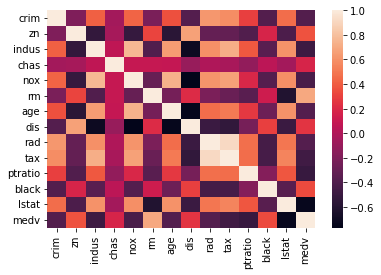

In [20]:
correlation = df.corr()
sns.heatmap(correlation)
target = correlation['medv']
print("The top 5 features are:\n",target.sort_values(ascending=False).iloc[1:6])
features = target.sort_values(ascending=False).iloc[1:6]

In [25]:
features = ['rm','zn','black']
target = 'medv'

In [26]:
data = df[['rm','zn','black','dis','chas','medv']]

In [27]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rm vs medv


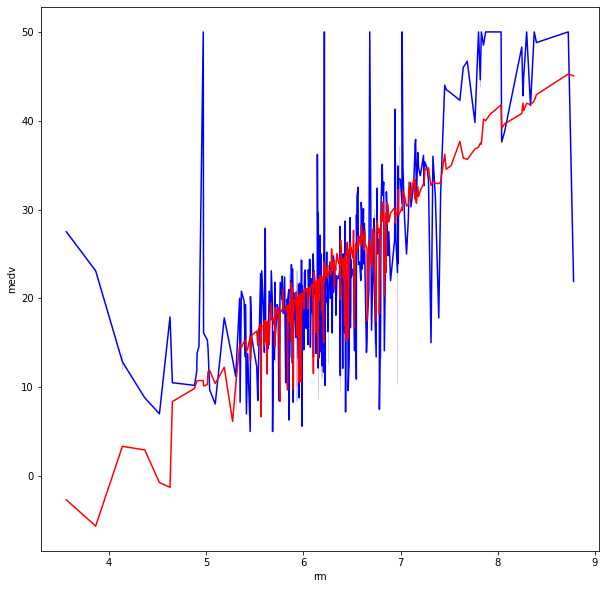

zn vs medv


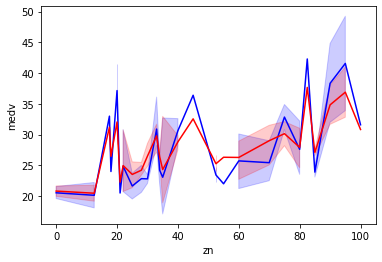

black vs medv


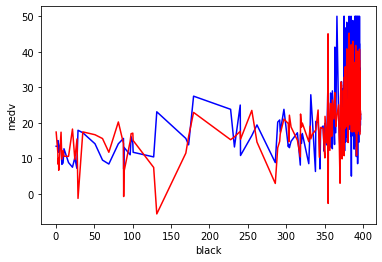

In [37]:
plt.figure(figsize=(10,10))

for i in features:
    print(f"{i} vs medv")
    sns.lineplot(x = X_test[i], y=y_test, color = 'blue')
    sns.lineplot(x = X_test[i], y=y_pred, color = 'red')
    plt.show()

In [38]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mean squared error : {mse} & r2 score : {r2}")

mean squared error : 39.43617896280632 & r2 score : 0.5494880474736579
